### 前提条件
このポストを理解するためには、以下の内容を知っていると良いです。

- 標本と標準誤差の意味
- 複数の標本集団を比較する方法

### 複数の標本集団を比較する方法
研究や調査を進める中で、複数の標本集団の平均を比較する必要が出てくることがあります。

例えば、食品AとBが体重にどのような影響を与えるのかを調べる調査を行うとします。この質問に答えるために、以下のように研究を進めることができます。

まず、体重に大きな差がない被験者集団を募集し、その集団を3つのグループに分けます。1つは対照群、他の2つは食品AとBだけを食べるグループとして、それぞれの食事を調整します。そして、それぞれのグループ間の体重差があるかを「グループ差に関する適切な指標」を作って確認します。

食品AとB、そして対照群が一定の期間それぞれの食事をした後に測定した体重の分布が図1のようになったと仮定します。被験者間の体重に大きな差がないと仮定したので、複数の標本集団は1つの母集団から抽出された標本と考えられます。

**図1. 母集団から抽出された3つのグループの表示。各円は被験者1人を意味し、異なる色は異なる標本集団を示す。**

図1を見ると、食品AとBが体重に特別な影響を与えていないことが分かります。しかし、実際の研究過程では、母集団全体を確認するのは難しく、標本集団の分布のみを確認することができます。各グループの標本集団だけを別々に表示すると、図2のようになります。

**図2. 食品A、Bと対照群の各標本集団を示した図。赤い点と赤い線は各標本グループの平均と標準偏差を示している。**

図1とは異なり、図2を見ると標本集団ごとに平均の差があるように見えます。特に、図2の最下段のサブプロットを見ると、標本平均に若干の差があることが確認できます。

図1と図2の結果を総合すると、グループ間の差について次のように考えることができます。

**この差は食品の影響によるものか、それとも他の理由で体重が（ランダムに）変化したためか？** ー 質問 (☆)

### F値の意味: 差異 / 不確実性
F値は、複数の標本集団を比較するための指標であり、結論から言えば、F値はt値とほぼ同じ意味を持ちます。

つまり、t値が持つ意味と同様に、F値も「差異 / 不確実性」で標本グループ間の差を数値で表しています。

**複数の標本間の統計的指標: グループ間の差の程度 / 不確実性**

ここで、F値がt値と少し異なる点は、グループ間の差の程度と不確実性を少し変形して使用している点です。F値は、これらから計算された分散の比率を尺度として使用します。

### F値の論理的導出
#### グループ間分散とグループ内分散の計算
ここからは、3つのグループ間の差を確認してみましょう。前述のように、これを確認するために分散を使用します。

質問 (☆) に戻ると、食品の影響と体重のランダムな変化はどちらも「分散」で説明可能な概念です。

食品の影響が大きいかを確認するための分散は、各標本集団のグループ間の平均がどの程度離れているかで確認できます。この概念は、標本と標準誤差の意味のところで見たように、各集団は母集団から抽出した標本として考えることができます。

したがって、標本集団間のグループ間の分散は以下のように書けます。

$$
s^2_{bet} = n \cdot s^2_{\overline{X}}
$$

一方、食品以外の理由によるランダムな体重変化はグループ内分散として推定できます。

$$
s^2_{wit} = \frac{1}{3}(s^2_A + s^2_B + s^2_{con})
$$

#### 2つの分散の比率計算
2つの分散を計算した後、このプロセスは結局2つの方法で母分散を推定したことと同じです。そして、前述の以下の論理に基づいて、計算した2つの分散を割り算します。

**複数の標本間の統計的指標: グループ間の差の程度 / 不確実性**

F値は以下の2つの分散の比率として計算できます。

**図3. F値の分子と分母の意味**

F値が十分に大きい場合、それは各標本集団が同一の母集団から出てきたと考える確率が非常に低いことを意味します。

### 参考文献
- Primer of Biostatistics 6th Edition, Stanton A. Glantz, McGraw-Hill Medical Publishing Division


Mounted at /content/drive


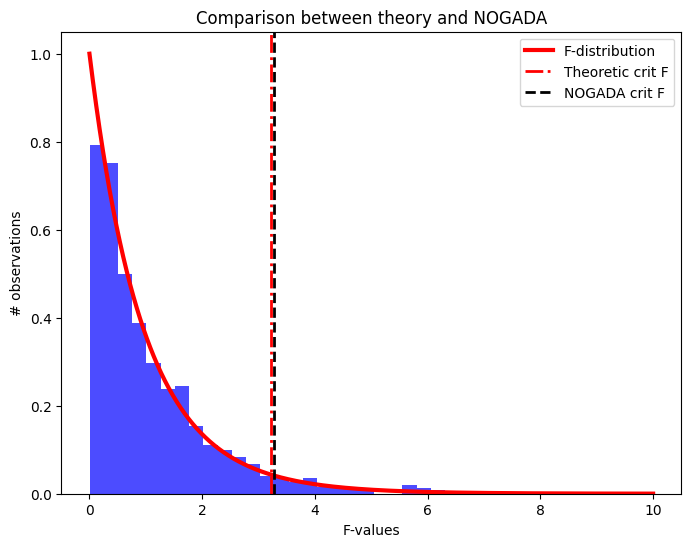

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f, f_oneway
from matplotlib.animation import FuncAnimation

from google.colab import drive
drive.mount('/content/drive')

# データの設定
np.random.seed(0)
X = np.random.randn(1000)

m = 3
n = 15
n_perm = 1000
F_perm = []

# プロットの設定
fig, ax = plt.subplots(figsize=(8, 6))

def update(frame):
    ax.cla()  # グラフをクリア
    X_smpl = np.zeros((n, m))

    # グループごとのサンプリング
    for i_m in range(m):
        X_smpl[:, i_m] = X[np.random.permutation(1000)[:n]]

    s_wit = np.sqrt(np.sum(np.std(X_smpl, axis=0) ** 2)) / np.sqrt(3)
    m_total = np.mean(X_smpl)
    temp = np.mean(X_smpl, axis=0) - m_total
    s_xbar = np.sqrt(np.sum(temp ** 2) / (m - 1))
    s_bet = np.sqrt(n) * s_xbar
    F = (s_bet ** 2) / (s_wit ** 2)
    F_perm.append(F)

    # ヒストグラムのプロット
    ax.hist(F_perm, bins=30, color='blue', alpha=0.7, density=True)

    # 理論的なF分布との比較
    x = np.linspace(0, 10, 1000)
    y = f.pdf(x, m - 1, m * (n - 1))
    ax.plot(x, y, 'r', linewidth=3, label='F-distribution')

    # 臨界値の計算とプロット
    F_crit = f.ppf(0.95, m - 1, m * (n - 1))
    F_nogada = np.quantile(F_perm, 0.95)
    ax.axvline(F_crit, color='r', linestyle='-.', linewidth=2, label='Theoretic crit F')
    ax.axvline(F_nogada, color='k', linestyle='--', linewidth=2, label='NOGADA crit F')

    ax.set_xlabel('F-values')
    ax.set_ylabel('# observations')
    ax.set_title('Comparison between theory and NOGADA')
    ax.legend()

# アニメーションの設定と保存
ani = FuncAnimation(fig, update, frames=n_perm, repeat=False)
ani.save('/content/drive/MyDrive/Colab Notebooks/F_distribution_comparison.gif', writer='imagemagick', fps=30)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/F_distribution_comparison.gif')